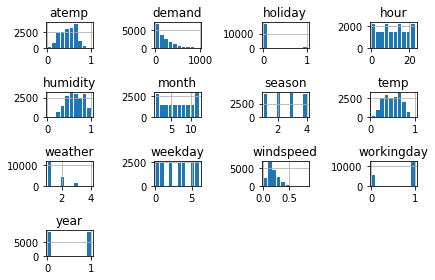

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# read the data 
data = pd.read_csv('E:\A-Z Data science\Kaggle Bike Demand Prediction\Bike-Sharing-Dataset\hour.csv')

#removing useless features
bikes = data.drop(['instant','dteday','casual','registered'], axis = 1)

#renaming the columns 
bikes.columns = ['season','year','month','hour','holiday','weekday','workingday','weather','temp','atemp','humidity','windspeed','demand']

#check for missing values for cleaning
bikes.isnull().sum()

#visualse data in a pandas histogram to see the distribution
bikes.hist(rwidth = .8)
plt.tight_layout()

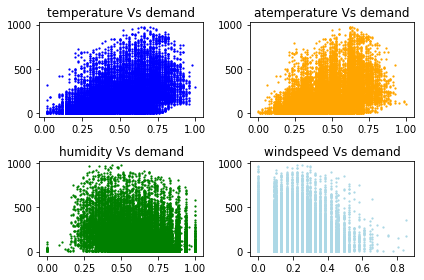

In [2]:

#visualise the various distribution vs demand
#these are continuous features

plt.subplot(2,2,1)
plt.title('temperature Vs demand')
plt.scatter(bikes['temp'], bikes['demand'],s=1.5, c ='blue')

plt.subplot(2,2,2)
plt.title('atemperature Vs demand')
plt.scatter(bikes['atemp'], bikes['demand'],s=1.5, c ='orange')

plt.subplot(2,2,3)
plt.title('humidity Vs demand')
plt.scatter(bikes['humidity'], bikes['demand'],s=1.5, c='green')

plt.subplot(2,2,4)
plt.title('windspeed Vs demand')
plt.scatter(bikes['windspeed'], bikes['demand'],s=1.5, c='lightblue')

plt.tight_layout()

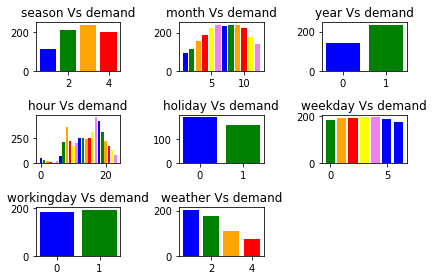

In [3]:

#viualise the categorical variables vs Demand

colors = ['blue','green','orange','red','yellow','violet']

plt.subplot(3,3,1)
plt.title('season Vs demand')
cat_x_variables = bikes['season'].unique()
cat_mean_demand = bikes.groupby('season').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,2)
plt.title('month Vs demand')
cat_x_variables = bikes['month'].unique()
cat_mean_demand = bikes.groupby('month').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,3)
plt.title('year Vs demand')
cat_x_variables = bikes['year'].unique()
cat_mean_demand = bikes.groupby('year').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,4)
plt.title('hour Vs demand')
cat_x_variables = bikes['hour'].unique()
cat_mean_demand = bikes.groupby('hour').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,5)
plt.title('holiday Vs demand')
cat_x_variables = bikes['holiday'].unique()
cat_mean_demand = bikes.groupby('holiday').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,6)
plt.title('weekday Vs demand')
cat_x_variables = bikes['weekday'].unique()
cat_mean_demand = bikes.groupby('weekday').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,7)
plt.title('workingday Vs demand')
cat_x_variables = bikes['workingday'].unique()
cat_mean_demand = bikes.groupby('workingday').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.subplot(3,3,8)
plt.title('weather Vs demand')
cat_x_variables = bikes['weather'].unique()
cat_mean_demand = bikes.groupby('weather').mean()['demand']
plt.bar(cat_x_variables, cat_mean_demand, color = colors)

plt.tight_layout()

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1a364248b48>)

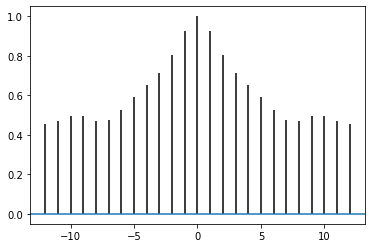

In [4]:

#------------------------------------------------------------------------------
#check assumptions of mutiple linear regression
#------------------------------------------------------------------------------
#linearity using correlation coefficient matrix using function 'corr' provided in pandas
correlation = bikes[['temp','atemp','humidity','windspeed','demand']].corr()

#ropping columns - atemp,windspeed, weekday, year,workingday
bike_prep = bikes.drop(['atemp','windspeed','weekday','year','workingday'],axis = 1)

#check autocorrelation in demand using acorr
# to so we need all values to be float not integer
df1 = pd.to_numeric(bike_prep['demand'], downcast = 'float')
plt.acorr(df1, maxlags = 12)


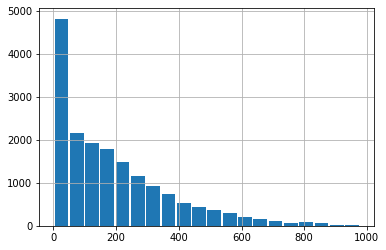

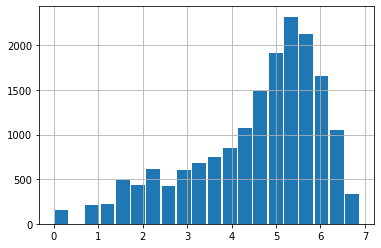

In [5]:

#------------------------------------------------------------------------------
#create/modify features
#------------------------------------------------------------------------------

#normalize the demand by checking if its log is normally distributed

df2 = bike_prep['demand']
df3 = np.log(df2)

plt.figure()
df2.hist(rwidth = 0.9, bins = 20)

plt.figure()
df3.hist(rwidth = 0.9, bins = 20)

#yes its log in normally distrebuted

bike_prep2 = bike_prep.copy()
bike_prep2['demand'] = np.log(bike_prep2['demand'])

#autocorrelation in demand

t_1 = bike_prep2['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bike_prep2['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bike_prep2['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bike_prep_lag = pd.concat([bike_prep2, t_1, t_2, t_3], axis = 1)
#drop rows with nan values
bike_prep_lag = bike_prep_lag.dropna()


In [6]:
#------------------------------------------------------------------------------
#create dummy variables for categorical variables
#------------------------------------------------------------------------------
#-season
#-holiday
#-weather
#-month
#-hour

bike_prep_category = bike_prep_lag.copy()
print(bike_prep_category.dtypes)
column = ['season','holiday','weather','month','hour']

for c in column:
  bike_prep_category[c] = bike_prep_category[c].astype('category')
print(bike_prep_category.dtypes)
bike_prep_category = pd.get_dummies(bike_prep_category, drop_first = True)



season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object
season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object


In [7]:
#------------------------------------------------------------------------------
#Splitting the data set
#------------------------------------------------------------------------------
#here we have autocorrelation therefore can't use random split
# we will either take from starting x% and leave rest for test or same from behind

Y = bike_prep_category[['demand']]
X = bike_prep_category.drop(['demand'], axis = 1)

tr_size = int(.7 * len(X))

X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0:tr_size]
Y_test = Y.values[tr_size:len(Y)]

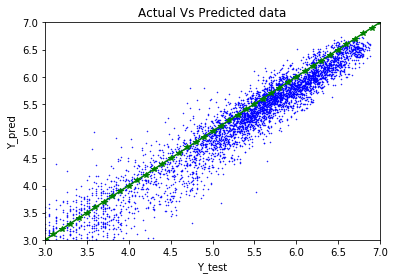

In [8]:
#------------------------------------------------------------------------------
# Fit and Score the model
#------------------------------------------------------------------------------

from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)

Y_pred = std_reg.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
rmse = math.sqrt(MSE(Y_test,Y_pred))

def score(y_test, y_pred):
    u = ((y_test - y_pred)**2).sum()
    v = ((y_test - y_test.mean())**2).sum()
    return(1-(u/v))
    
def cost(y_test, y_pred):
    return ((y_test-y_pred)**2).mean()
    
s1 = score(Y_test, Y_pred)
c1 = cost(Y_test, Y_pred)

#to calculate Root mean squared lograthmic error
#we need to convert Y_pred and Y_test values back to normal as we did use log on demand to normalise


def RMSLE(y_test, y_pred):
    return math.sqrt(((np.log(y_pred+1) - np.log(y_test+1))**2).mean())

#Y_test_exp = []
#Y_pred_exp = []

#for i in range(len(Y_test)):
#    Y_test_exp.append(math.exp(Y_test[i]))
#    Y_pred_exp.append(math.exp(Y_pred[i]))

Y_test_exp = np.exp(Y_test)
Y_pred_exp = np.exp(Y_pred)
rmsle = RMSLE(Y_test_exp,Y_pred_exp)

#------------------------------------------------------------------------------
#Visualise Y_pred and Y_test in a scatter plot
#------------------------------------------------------------------------------
plt.scatter(Y_test, Y_pred, s = 0.25, color = 'blue')
plt.axis([3,7,3,7])
xline = np.arange(3,8,.1)
yline = xline;
plt.plot(xline, yline, color ='green', marker = '*')
#plt.legend()
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Actual Vs Predicted data")
plt.show()